In [1]:
from pathlib import Path
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm

In [2]:
path = Path('/teamspace/studios/this_studio/.cache/kagglehub/competitions/airbus-ship-detection')
os.listdir(path)

['sample_submission_v2.csv',
 'test_v2',
 'train_ship_segmentations_v2.csv',
 'train_v2']

In [3]:
df = pd.read_csv(path/'train_ship_segmentations_v2.csv')
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [4]:
df = df.set_index('ImageId')

In [5]:
def get_mask(img_id, df):
    shape = (768,768)
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    masks = df.loc[img_id]['EncodedPixels']
    if(type(masks) == float): return img.reshape(shape)
    if(type(masks) == str): masks = [masks]
    for mask in masks:
        s = mask.split()
        
        for i in range(len(s)//2):
            start = int(s[2*i]) - 1
            length = int(s[2*i+1])
            img[start:start+length] = 1
    return img.reshape(shape).T

In [6]:
def show_img_mask(img_id, df):
    img = cv2.imread(os.path.join(path/'train_v2', img_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = get_mask(img_id, df)
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(mask, alpha=0.5)
    plt.show()

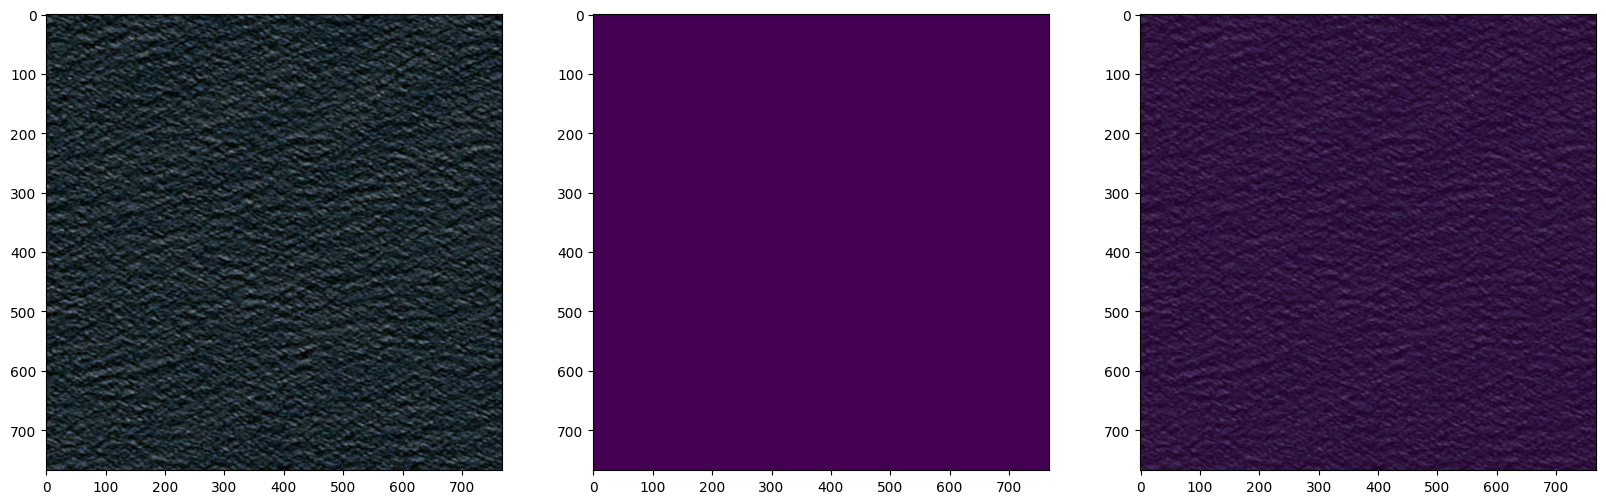

In [15]:
img_id = random.choice(df.index)
show_img_mask(img_id, df)

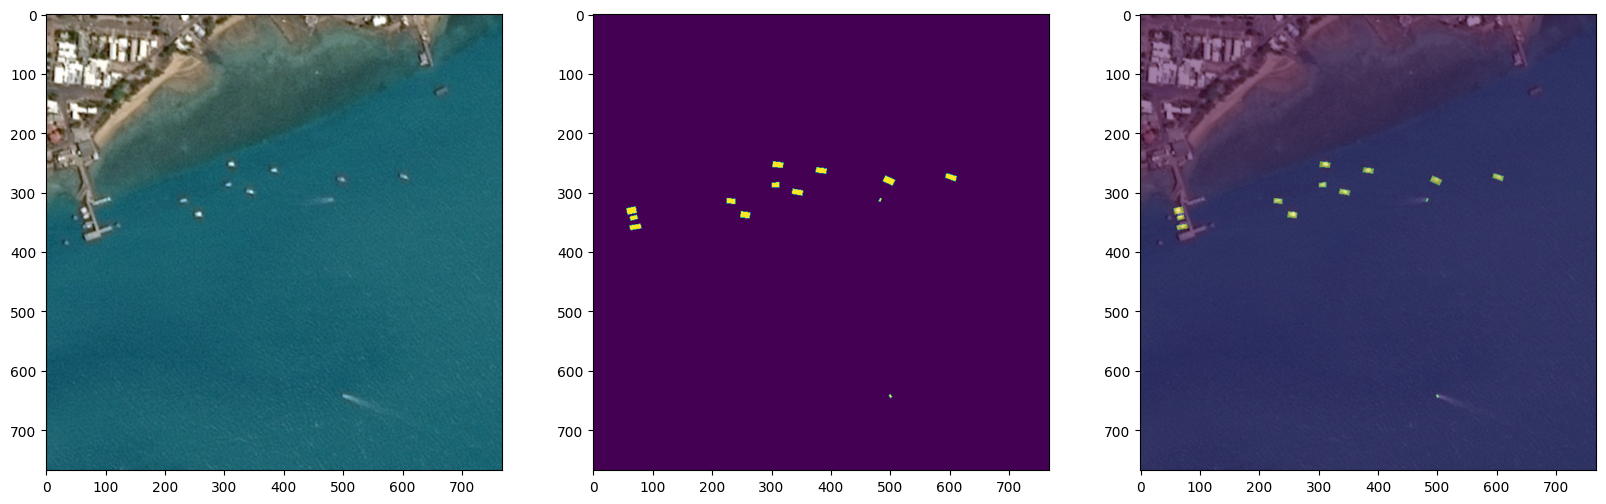

In [14]:
img_id = random.choice(df.index)
show_img_mask(img_id, df)

In [16]:
# Create directory to save masks
df = pd.read_csv(path/'train_ship_segmentations_v2.csv')
save_dir = Path("masks_npy")
save_dir.mkdir(exist_ok=True)

# Get all unique image ids
image_ids = df['ImageId'].unique()

# Re-index dataframe once (avoid repeated set_index)
df_indexed = df.set_index('ImageId')

for img_id in tqdm(image_ids):
    mask = get_mask(img_id, df_indexed)
    save_path = save_dir / f"{img_id}.npy"
    np.save(save_path, mask)

print("All masks saved successfully!")

100%|██████████| 192556/192556 [04:46<00:00, 671.16it/s] 

All masks saved successfully!
